In [14]:
#import libraries and train and test variables  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%store -r X_train_selected
%store -r X_test_selected
%store -r y_train
%store -r y_test

print(X_train_selected[0,0:5], y_train[0:5])

[0.19249878 0.         0.38787106 0.         0.07452687] [0 3 2 0 1]


Train Model with Random Forest Classification algorithm 

In [15]:
#train model with random forest classification algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
RF = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
RF.fit(X_train_selected, y_train)
y_pred = RF.predict(X_test_selected)
print(classification_report(y_test, y_pred))

#save classification report to text file
with open('/Users/stevennguyen/Projects/Cancer-Subset-Predictor-/reports/classification_report.txt', 'w') as f:
    f.write(classification_report(y_test, y_pred))      


              precision    recall  f1-score   support

           0       0.97      1.00      0.98        60
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        30
           3       1.00      0.93      0.96        28
           4       1.00      1.00      1.00        27

    accuracy                           0.99       161
   macro avg       0.99      0.99      0.99       161
weighted avg       0.99      0.99      0.99       161



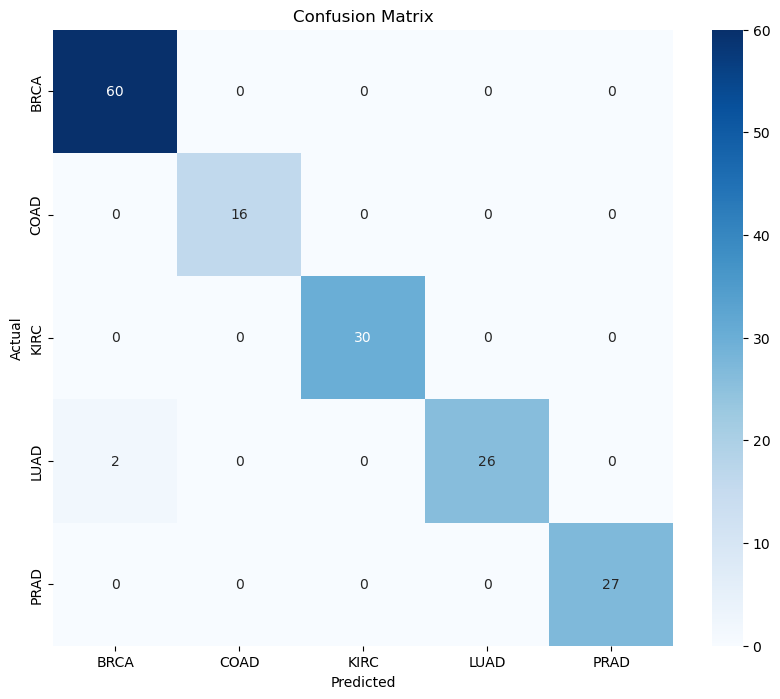

In [17]:
#confusion matrix 
cm = confusion_matrix(y_test, y_pred)
# add encoded labels to confusion matrix
%store -r le
labels = le.classes_
cm_df = pd.DataFrame(cm, index=le.classes_, columns=le.classes_)
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')

plt.savefig('/Users/stevennguyen/Projects/Cancer-Subset-Predictor-/reports/confusion_matrix.pdf')
plt.show()